<a href="https://colab.research.google.com/github/Frankl1sales/cnc_d/blob/main/Relat%C3%B3rio_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos

## Bibliotecaimport numpy as np


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Lagrange

In [ ]:
# Algoritmo Polinômio de Lagrange
# Objetivo: Interpolar valor usando polinômio de Lagrange

# Função para calcular o polinômio de Lagrange
def lagrange_interpolation(x, y, z):
    m = len(x)  # número de pontos
    Pz = 0  # valor interpolado

    for i in range(m):
        c = 1
        d = 1
        for j in range(m):
            if i != j:
                c *= (z - x[j])
                d *= (x[i] - x[j])
        Pz += y[i] * (c / d)

    return Pz

In [ ]:
# Exemplo de uso
x = [-1, 0, 2]  # vetor de abscissas
y = [4, 1, -1]  # vetor de ordenadas
z = 0.8  # valor a interpolar

# Calculando o valor interpolado
Pz = lagrange_interpolation(x, y, z)
print(f'O valor interpolado em z={z} é Pz={Pz}')

O valor interpolado em z=0.8 é Pz=-0.43999999999999995


## Newton

In [ ]:
def newton_interpolation(x, y, z):
    m = len(x)  # número de pontos
    Dely = y.copy()  # inicializa o vetor das diferenças divididas com os valores de y

    # Construção das diferenças divididas
    for i in range(1, m):
        for k in range(m - 1, i - 1, -1):
            Dely[k] = (Dely[k] - Dely[k - 1]) / (x[k] - x[k - i])

    # Avaliação do polinômio pelo método de Horner
    Pz = Dely[m - 1]
    for i in range(m - 2, -1, -1):
        Pz = Pz * (z - x[i]) + Dely[i]

    return Pz

In [ ]:
 # Exemplo de uso
x = [1, 2, 3]  # vetor de abscissas
y = [2, 3, 5]  # vetor de ordenadas
z = 2.5  # valor a interpolar

# Calculando o valor interpolado
Pz = newton_interpolation(x, y, z)
print(f'O valor interpolado em z={z} é Pz={Pz}')

O valor interpolado em z=2.5 é Pz=3.875


## MMQ

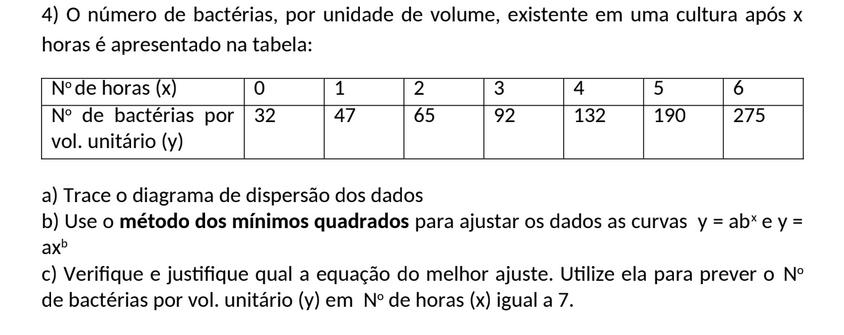

In [ ]:
# Função modelo para o ajuste (não-linear)
model_func_exp = lambda x, a, b, c: a * b**x + c
model_func_pow = lambda x, a, b, c: a * x**b + c

In [ ]:
# Plotando os dados originais
def pointsPlot(x_data, y_data):
  plt.scatter(x_data, y_data, label='Dados originais')
  plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')

  plt.title('Ajuste não-linear usando o método dos mínimos quadrados')
  plt.show()

In [ ]:
def linePlot(x_data, y_data, y_fit_exp, y_fit_pow, a_exp, b_exp, c_exp, a_pow, b_pow, c_pow):
    # Gerar pontos para a curva ajustada
    x_fit = np.linspace(min(x_data), max(x_data), 10)

    # Plotar os pontos originais e a curva ajustada
    plt.scatter(x_data, y_data, label='Pontos Originais', color='red')
    plt.plot(x_fit, y_fit_exp, color='green', label=f'Curva Ajustada (y = ab^x)\n$y = {a_exp:.2f} \cdot {b_exp:.2f}^x$')
    plt.plot(x_fit, y_fit_pow, color='brown', label=f'Curva Ajustada (y= ax^b)\n$y = {a_pow:.2f} \cdot x^{b_pow:.2f}$')
    plt.xlabel('Horas (x)')
    plt.ylabel('Número de Bactérias (y)')
    plt.ylim([0, 300])  # Ajustar o limite do eixo y
    plt.legend()
    plt.title('Ajuste Não-linear usando o Método dos Mínimos Quadrados')
    plt.show()

In [ ]:
def dataFrame(x_data, y_data):
  # Criar um DataFrame com os dados
  df = pd.DataFrame({
      'x': x_data,
      'y': y_data,
      'xy': x_data * y_data,
      'x^2': x_data ** 2
  })

  # Calcular os somatórios
  sums = df.sum()
  sums.name = 'Soma'
  df = pd.concat([df, sums.to_frame().T], ignore_index=False)

  # Exibir a tabela
  print(df)

In [ ]:
def mmq_fit(x_data, y_data):
    # Transformar y_data para ln(y_data)
    ln_y_data = [math.log(y) for y in y_data]

    # Calcular as somas necessárias
    n = len(x_data)
    sum_x = sum(x_data)
    sum_ln_y = sum(ln_y_data)
    sum_x2 = sum(x**2 for x in x_data)
    sum_x_ln_y = sum(x * ln_y for x, ln_y in zip(x_data, ln_y_data))

    # Calcular os coeficientes de ajuste
    b = (n * sum_x_ln_y - sum_x * sum_ln_y) / (n * sum_x2 - sum_x**2)
    ln_a = (sum_ln_y - b * sum_x) / n
    a = math.exp(ln_a)

    return a, b

In [ ]:
def mmq_fit_exponential(x_data, y_data):
    # Transformar y_data para ln(y_data)
    ln_y_data = [math.log(y) for y in y_data]

    # Calcular as somas necessárias
    n = len(x_data)
    sum_x = sum(x_data)
    sum_ln_y = sum(ln_y_data)
    sum_x2 = sum(x**2 for x in x_data)
    sum_x_ln_y = sum(x * ln_y for x, ln_y in zip(x_data, ln_y_data))

    # Calcular os coeficientes de ajuste
    b_ln = (n * sum_x_ln_y - sum_x * sum_ln_y) / (n * sum_x2 - sum_x**2)
    ln_a = (sum_ln_y - b_ln * sum_x) / n
    a = math.exp(ln_a)
    b = math.exp(b_ln)

    return a, b

In [ ]:
def mmq_fit_power(x_data, y_data):
    # Transformar y_data e x_data para ln(y_data) e ln(x_data)
    ln_y_data = [math.log(y) for y in y_data]
    ln_x_data = [math.log(x) for x in x_data if x != 0]  # Evitar log(0)

    # Filtrar y_data para corresponder a ln_x_data
    ln_y_data = [ln_y for x, ln_y in zip(x_data, ln_y_data) if x != 0]

    # Calcular as somas necessárias
    n = len(ln_x_data)
    sum_ln_x = sum(ln_x_data)
    sum_ln_y = sum(ln_y_data)
    sum_ln_x2 = sum(x**2 for x in ln_x_data)
    sum_ln_x_ln_y = sum(x * y for x, y in zip(ln_x_data, ln_y_data))

    # Calcular os coeficientes de ajuste
    b = (n * sum_ln_x_ln_y - sum_ln_x * sum_ln_y) / (n * sum_ln_x2 - sum_ln_x**2)
    ln_a = (sum_ln_y - b * sum_ln_x) / n
    a = math.exp(ln_a)

    return a, b

In [ ]:
# Calcular o EQM para cada modelo
def calculate_mse(model_func, x_data, y_data, a, b):
    predictions = model_func(x_data, a, b,0)
    mse = np.mean((y_data - predictions) ** 2)
    return mse

Coeficientes ajustados (exponencial): a = 32.1468513163175, b = 1.4269588061798035
Coeficientes ajustados (potência): a = 38.8387110601799, b = 0.9630907218717832


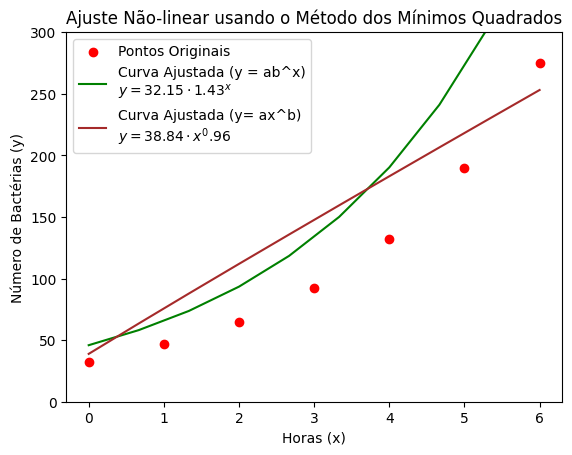

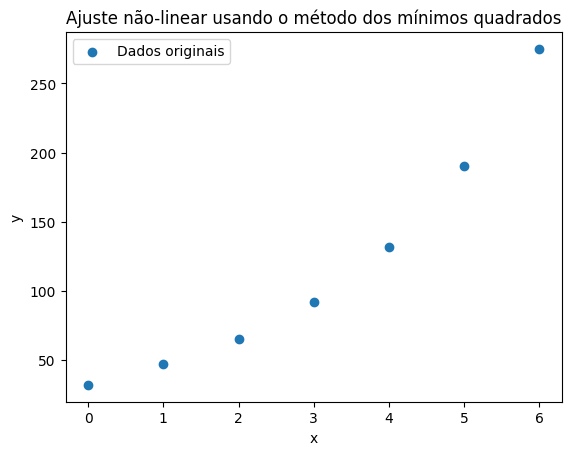

EQM y = ab^x: 2.591728133053752
EQM y = ax^b: 732.6949329112447
Previsão Exponencial para x = 7: 387.2741356647424
Previsão Potência para x = 7: 253.02934423935858


In [ ]:
# Dados de exemplo
x_data = np.array([0, 1, 2, 3, 4, 5, 6])
y_data = np.array([32,47, 65, 92, 132, 190, 275])

# Ajustar o modelo exponencial aos dados
a_exp, b_exp = mmq_fit_exponential(x_data, y_data)
print(f"Coeficientes ajustados (exponencial): a = {a_exp}, b = {b_exp}")

# Ajustar o modelo de potência aos dados
a_pow, b_pow = mmq_fit_power(x_data, y_data)
print(f"Coeficientes ajustados (potência): a = {a_pow}, b = {b_pow}")

n = len(x_data)
x_fit = np.linspace(1, n, 10)
y_fit_exp = model_func_exp(x_fit, a_exp, b_exp, 0)  # c = 0
y_fit_pow = model_func_pow(x_fit, a_pow, b_pow, 0)  # c = 0

# Plotar as curvas ajustadas
linePlot(x_data, y_data, y_fit_exp, y_fit_pow, a_exp, b_exp, 0, a_pow, b_pow, 0)

pointsPlot(x_data, y_data)

# Calcular o EQM para ambos os modelos
mse_exp = calculate_mse(model_func_exp, x_data, y_data, a_exp, b_exp)
mse_pow = calculate_mse(model_func_pow, x_data, y_data, a_pow, b_pow)

print(f"EQM y = ab^x: {mse_exp}")
print(f"EQM y = ax^b: {mse_pow}")

# Previsão para x = 7
x_new = 7
y_pred_exp = model_func_exp(x_new, a_exp, b_exp,0)
y_pred_pow = model_func_pow(x_new, a_pow, b_pow,0)

print(f"Previsão Exponencial para x = 7: {y_pred_exp}")
print(f"Previsão Potência para x = 7: {y_pred_pow}")

## Geração de Gráficos

In [ ]:
import pandas as pd
import numpy as np

def newton_interpolation_process(x, y):
    m = len(x)  # número de pontos
    Dely = np.zeros((m, m))
    Dely[:, 0] = y  # inicializa a primeira coluna com os valores de y

    # Construção das diferenças divididas
    for i in range(1, m):
        for k in range(m - 1, i - 1, -1):
            Dely[k, i] = (Dely[k, i - 1] - Dely[k - 1, i - 1]) / (x[k] - x[k - i])

    # Convertendo para um DataFrame do Pandas
    df = pd.DataFrame(Dely)
    return df

# Exemplo de uso
x = [1, 2, 3]  # vetor de abscissas
y = [2, 3, 5]  # vetor de ordenadas
df = newton_interpolation_process(x, y)
print(df)


     0    1    2
0  2.0  0.0  0.0
1  3.0  1.0  0.0
2  5.0  2.0  0.5


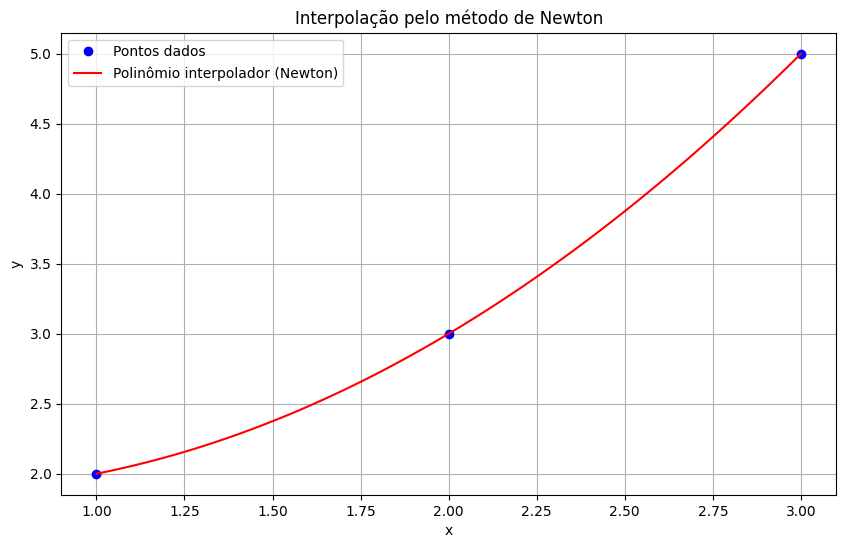

In [ ]:
import matplotlib.pyplot as plt

def plot_interpolation(x, y, z_values, Pz_values, method_name):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'bo', label='Pontos dados')
    plt.plot(z_values, Pz_values, 'r-', label=f'Polinômio interpolador ({method_name})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Interpolação pelo método de {method_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo de uso
x = [1, 2, 3]  # vetor de abscissas
y = [2, 3, 5]  # vetor de ordenadas
z_values = np.linspace(1, 3, 100)  # valores de z para plotar

# Calculando valores interpolados para cada z usando Newton
Pz_values_newton = [newton_interpolation(x, y, z) for z in z_values]

# Plotando o resultado da interpolação de Newton
plot_interpolation(x, y, z_values, Pz_values_newton, 'Newton')

